In [ ]:
import pandas as pd
import numpy as np
import torch as torch
import os, sys
import math


import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn import linear_model
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
import random

from PIL import Image
from sklearn.metrics import r2_score
from matplotlib.colors import Normalize
from sklearn.metrics import r2_score



In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

os.chdir("/content/gdrive//MyDrive/Transformer") # change to your directory
print("The path is:", os.getcwd() )
print("All the files are: ",os.listdir())

Mounted at /content/gdrive/
The path is: /content/gdrive/MyDrive/Transformer
All the files are:  ['fullDatasetSW.csv', 'fullDatasetDM.csv', 'fullDatasetDF.csv', 'dependencies.py', 'fullDatasetSY (1).csv', 'tokenTrainingSY.csv', 'tokenTrainingSW.csv', 'tokenTrainingDM.csv', 'tokenTrainingDF.csv', 'tokenTrainingObsData.csv', 'SNPpositions (1).xlsx', 'finalTrainingSet.xlsx', '2021TrainingPhenotypes.xlsx', 'YieldOnlyTransformer', '2021_Training_Set_Tokenized.csv', '100SeedWeightEffects.csv', 'PlotWeightEffects.csv', 'MoistureEffects.csv', 'DaysToFloweringEffects (1).csv', 'YieldEffects.csv', 'DaysToFloweringEffects.csv', 'noTokenresultsRR.csv', 'loss_values_dModels_300.csv', '100 Seed weighteffects.csv', '100 Seed weightallTrueEstimated.csv', '100 Seed weighttokenTrainingSet.csv', 'Plot WeightallTrueEstimated.csv', 'Plot Weighteffects.csv', 'Plot WeighttokenTrainingSet.csv', 'MoistureallTrueEstimated.csv', 'Moistureeffects.csv', 'MoisturetokenTrainingSet.csv', 'YieldallTrueEstimated.csv', 

In [ ]:
data = pd.read_csv("BLB_fullset.csv")


target = "pheno.yd19"

y = data[target]
X = data.drop(columns=[col for col in data.columns if "pheno" in col or col in ["Unnamed: 0", "Row.names"]])
fullset = pd.concat([X,y],axis=1)
fullset.dropna(subset=[target], inplace=True) # Drop rows with NaN in the target column
data = fullset.dropna()
X = fullset.drop(target,axis=1)
y = fullset[target]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, shuffle=True)

LR = linear_model.Ridge(1000)
LR.fit(xTrain, yTrain)

# Plotting the coefficients
coefs_subset = LR.coef_

(2315,)

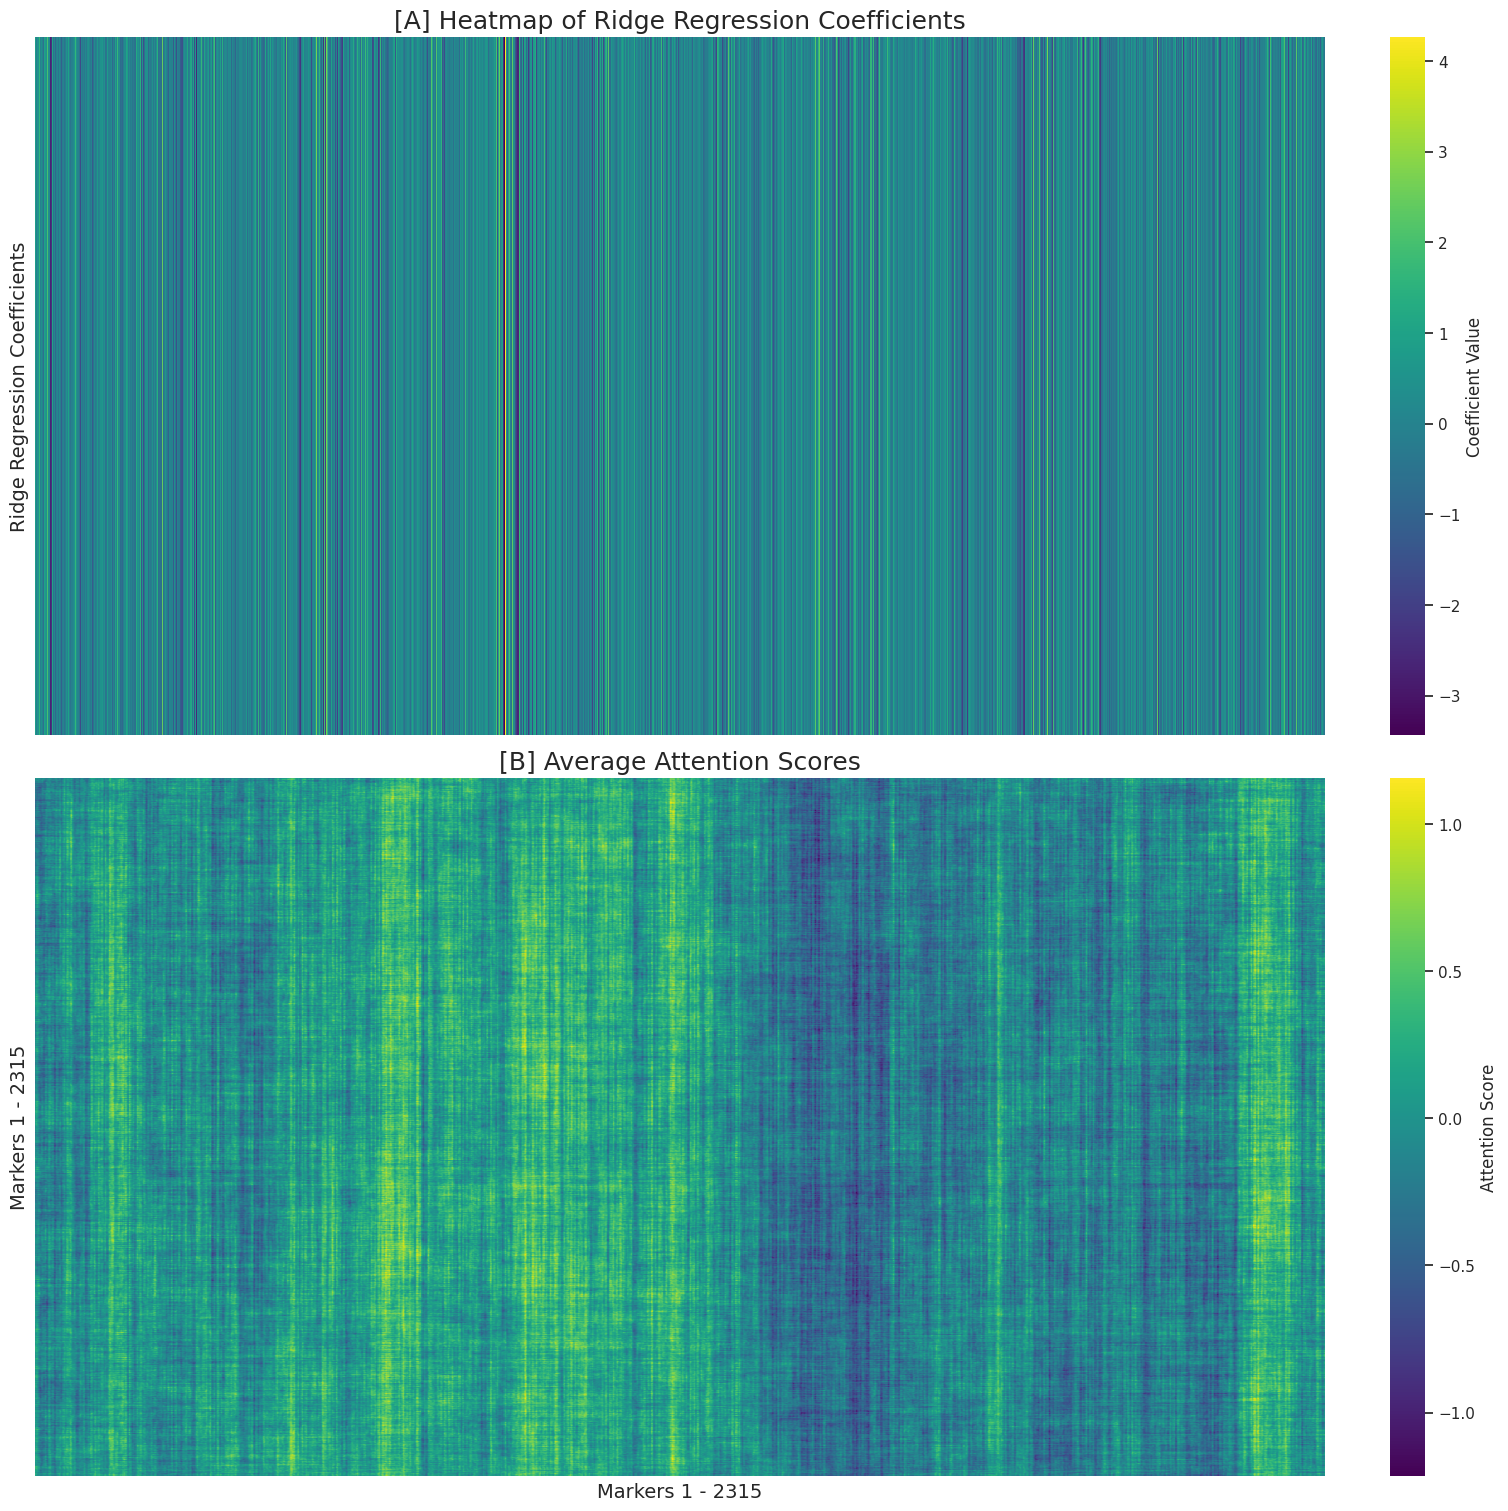

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Load data
attention = pd.read_csv("attention_weights_epoch49_BLB19.csv")

data = pd.read_csv("BLB_fullset.csv")
target = "pheno.yd19"
y = data[target]
X = data.drop(columns=[col for col in data.columns if "pheno" in col or col in ["Unnamed: 0", "Row.names"]])
fullset = pd.concat([X, y], axis=1)
fullset.dropna(subset=[target], inplace=True)
data = fullset.dropna()
X = fullset.drop(target, axis=1)
y = fullset[target]

from sklearn.model_selection import train_test_split
from sklearn import linear_model

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, shuffle=True)

LR = linear_model.Ridge(1000)
LR.fit(xTrain, yTrain)

coefs_subset = LR.coef_
df_coefs = pd.DataFrame([coefs_subset], index=[""])
# blank index so no extra Y tick label

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 15), constrained_layout=True)

# Heatmap A: Ridge Coefficients (1x2315)
sb.heatmap(
    df_coefs,
    cmap='viridis',
    cbar=True,
    xticklabels=False,
    yticklabels=False,
    ax=axs[0]
)
axs[0].set_title("[A] Heatmap of Ridge Regression Coefficients", fontsize=18)
axs[0].set_xlabel("")  # No xlabel for top plot
axs[0].set_ylabel("Ridge Regression Coefficients", fontsize=14)

# Adjust colorbar label for top heatmap
cbar = axs[0].collections[0].colorbar
cbar.set_label('Coefficient Value', fontsize=12)

# Heatmap B: Attention Scores (2315x2315)
sb.heatmap(
    attention,
    cmap='viridis',
    cbar=True,
    xticklabels=False,
    yticklabels=False,
    ax=axs[1]
)
axs[1].set_title("[B] Average Attention Scores", fontsize=18)
axs[1].set_xlabel("Markers 1 - 2315", fontsize=14)
axs[1].set_ylabel("Markers 1 - 2315", fontsize=14)

# Adjust colorbar label for bottom heatmap
cbar2 = axs[1].collections[0].colorbar
cbar2.set_label('Attention Score', fontsize=12)

plt.show()


PLOT WITHIN YEAR

In [ ]:
data = pd.read_csv("WithinYear.csv")

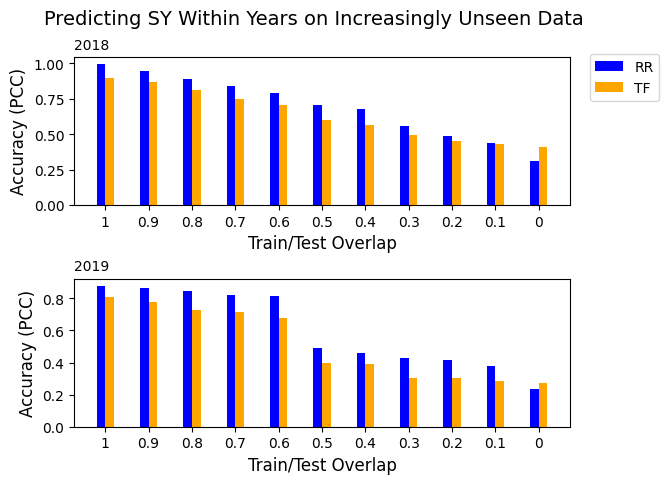

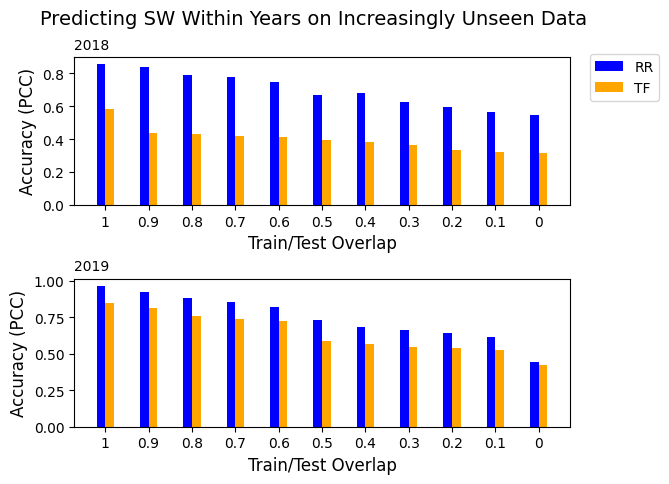

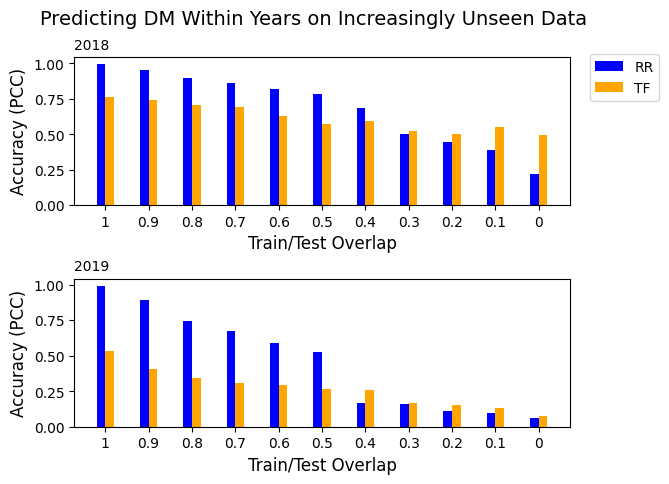

In [ ]:
traits = ["SY","SW","DM"]


traits = ["SY", "SW", "DM"]
x = np.arange(10)  # Adjust as needed
width = 0.20
labels = ["RR", "TF"]

traits = ["SY", "SW", "DM"]
x = np.arange(10)  # Adjust as needed
width = 0.20  # Adjust bar width
labels = ["RR", "TF"]  # Your labels

for trait in traits:
    plot = data[data["Scenario"].str.contains(trait)]
    fig, axs = plt.subplots(2)

    fig.suptitle(f'Predicting {trait} Within Years on Increasingly Unseen Data',size=14)

    sub1 = plot.iloc[0:2,:]
    sub2 = plot.iloc[2:4,:]


    # Iterate through columns and plot two bars side-by-side
    for i, column in enumerate(sub1.columns[1:]):
        axs[0].bar(i - width/2, sub1[column].values[0], width, label=labels[0] if i ==0 else "", color='blue')
        axs[0].bar(i + width/2, sub1[column].values[1], width, label=labels[1] if i ==0 else "",color='orange')
    for i, column in enumerate(sub2.columns[1:]):
        axs[1].bar(i - width/2, sub2[column].values[0], width, color='blue')
        axs[1].bar(i + width/2, sub2[column].values[1], width, color='orange')

    # Set x-axis tick labels to column names
    axs[0].set_xticks(range(len(sub1.columns[1:])))
    axs[0].set_xticklabels(sub1.columns[1:])
    axs[1].set_xticks(range(len(sub2.columns[1:])))
    axs[1].set_xticklabels(sub2.columns[1:])

    axs[0].set_title("2018",loc='left',size=10)  # Subtitle for the first subplot
    axs[1].set_title("2019",loc="left",size=10)

    axs[0].set_xlabel("Train/Test Overlap",size=12)
    axs[0].set_ylabel("Accuracy (PCC)",size=12)
    axs[1].set_xlabel("Train/Test Overlap",size=12)
    axs[1].set_ylabel("Accuracy (PCC)",size=12)

    plt.subplots_adjust(hspace=0.5)

    fig.legend(loc='upper right',bbox_to_anchor=(1.05, .9))
    plt.show()


PLOT AMONG YEARS

In [ ]:
data = pd.read_csv("AmongYear.csv")
data = data.drop(["Unnamed: 2"],axis=1)

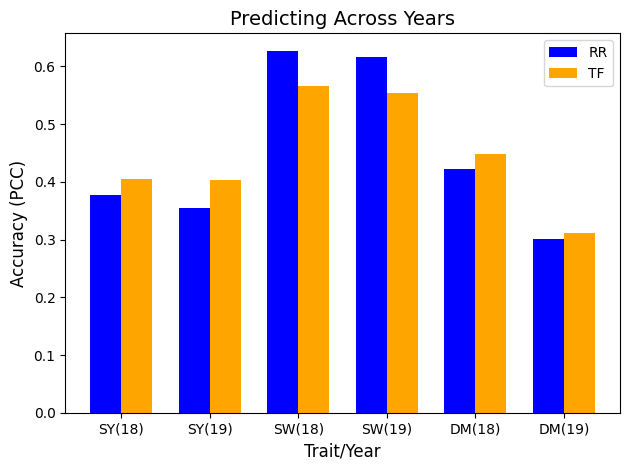

In [ ]:
values = data['RR'].values.reshape(-1, 2)
labels = ["SY(18)","SY(19)","SW(18)","SW(19)","DM(18)","DM(19)"]
bar_labels = ['RR', 'TF']

x = np.arange(len(labels))  # group positions
width = 0.35  # width of individual bars

fig, ax = plt.subplots()

# Plot each bar in group
bar1 = ax.bar(x - width/2, values[:, 0], width, label=bar_labels[0],color="blue")
bar2 = ax.bar(x + width/2, values[:, 1], width, label=bar_labels[1],color="orange")

# Add labels and legend
ax.set_xlabel('Trait/Year', size=12)
ax.set_ylabel('Accuracy (PCC)',size=12)
ax.set_title('Predicting Across Years',size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

PLOT BY LOCATION

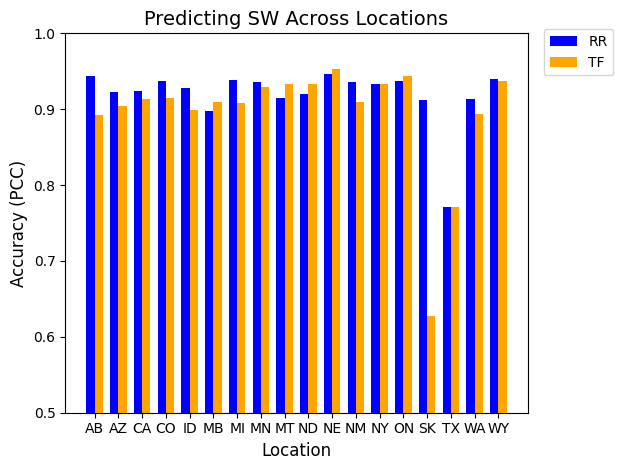

In [ ]:
traits = ["SW"]
for trait in traits:

  data = pd.read_csv(f"Locations{trait}.csv")
  bar_labels = ['RR', 'TF']
  labels = data['Location'].unique()

  x = np.arange(len(labels))  # group positions
  width = 0.35  # width of individual bars

  fig, ax = plt.subplots()

  # Plot each bar in group
  bar1 = ax.bar(x - width/2, data['RR'], width, label=bar_labels[0],color="blue")
  bar2 = ax.bar(x + width/2, data['TF'], width, label=bar_labels[1],color="orange")

  # Add labels and legend
  ax.set_xlabel('Location', size=12)
  ax.set_ylabel('Accuracy (PCC)',size=12)
  ax.set_title(f'Predicting {trait} Across Locations',size=14)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.set_ylim(bottom=0.5)

  ax.legend(loc='right', bbox_to_anchor=(1.2, .95))

  plt.tight_layout()
  plt.show()

SHOW FINAL ATTENTION MATRIX

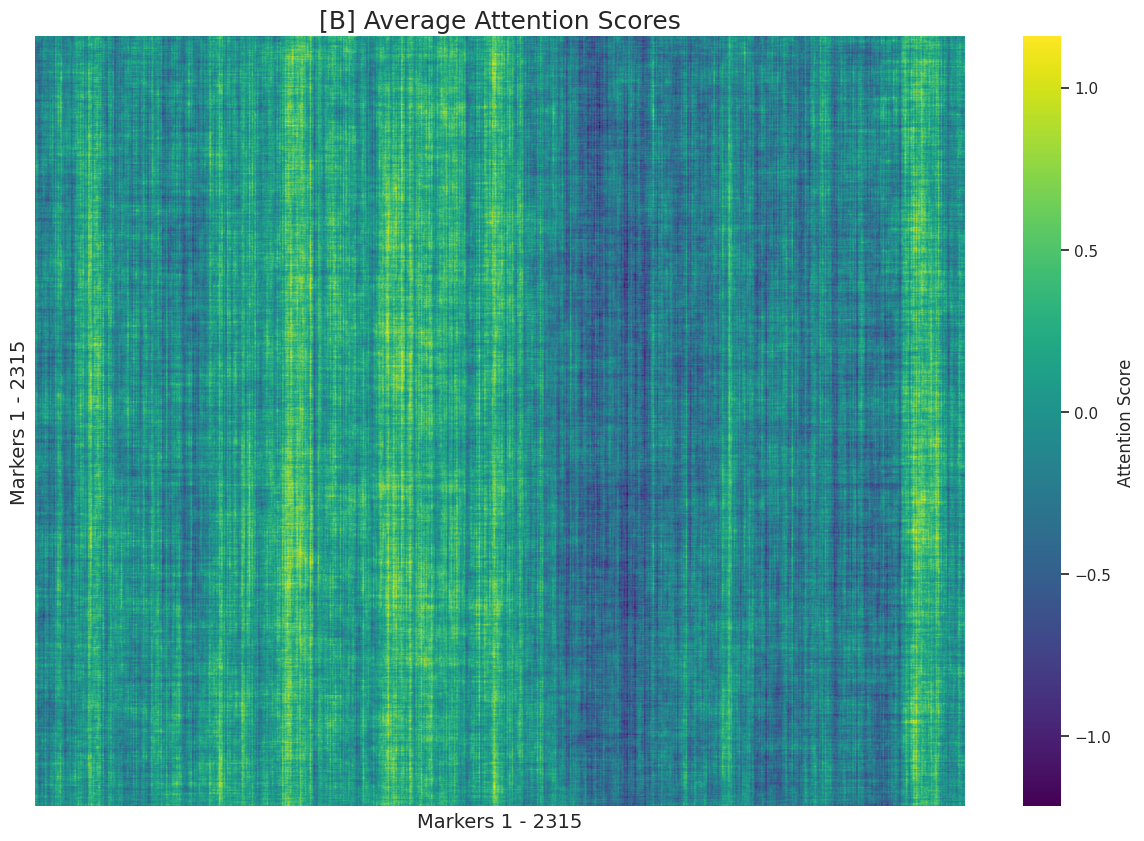

In [ ]:
plot = pd.read_csv(f"attention_weights_epoch49_BLB19.csv")

# Set the theme and figure size
sb.set_theme(rc={'figure.figsize': (15, 10)})

# Create the heatmap with color bar and no ticks
ax = sb.heatmap(
    plot,
    cmap="viridis",
    xticklabels=False,
    yticklabels=False,
    cbar=True,  # Enable color bar (legend)
)

# Get the colorbar object after creating the heatmap with cbar=True
cbar = ax.collections[0].colorbar
cbar.set_label('Attention Score')

ax.set_title("Average Attention Scores",fontsize=18)
ax.set_xlabel("Markers 1 - 2315",fontsize=14)
ax.set_ylabel("Markers 1 - 2315",fontsize=14)

# Show the plot
plt.show()

Prepare Data

In [ ]:

# call epistasis scores and rename markers for consistency
epi = pd.read_csv("pheno.csv")
epi['Marker'] = epi["Marker"].apply(lambda x: x[5:] if isinstance(x, str) else x)

#call in genotype data and name markers
data = pd.read_csv("BLB_fullset.csv")
geno = data.drop(columns=[col for col in data.columns if "pheno" in col or col in ["Unnamed: 0", "Row.names"]])
geno.columns = geno.columns.str[5:]

#call in attention weights
attentionWeights = pd.read_csv("attention_weights_epoch49_BLB19.csv")
#attentionWeights = np.abs(attentionWeights)
top_50= attentionWeights.unstack().sort_values(ascending=True).head(100) #take top 100 scores
top_50 = top_50.reset_index()
top_50.columns = ['Column', 'Row', 'Value']

#pull names of loci associated with highest scores
loci_indices_Column = top_50['Column'].values.astype(int)
loci_indices_Row = top_50['Row'].values.astype(int)
loci_list_Column = pd.DataFrame(geno.columns[loci_indices_Column])
loci_list_Row = pd.DataFrame(geno.columns[loci_indices_Row])

#concat all data for plotting
loci_list_all = pd.concat([loci_list_Row,loci_list_Column,top_50],axis=1)
loci_list_all.columns = ["Row Marker","Column Marker","Column Index","Row Index","Value"]

epiRow = epi.copy()
epiRow.columns = ["Row Marker","Chromosome","Position (bp)","pvalue.Q"]
epiRow.drop(["Chromosome","Position (bp)"],axis=1)

epiCol = epi.copy()
epiCol.columns = ["Column Marker","Chromosome","Position (bp)","pvalue.Q"]
epiCol.drop(["Chromosome","Position (bp)"],axis=1)

all_Row_Data = pd.merge(epiRow,loci_list_all,on="Row Marker")
all_Col_Data = pd.merge(epiCol,loci_list_all,on="Column Marker")

all_Row_Data.sort_values(by="pvalue.Q",ascending=True,inplace=True)
all_Col_Data.sort_values(by="pvalue.Q",ascending=True,inplace=True)

all_Col_Data

Column Marker  Chromosome  Position (bp)  pvalue.Q    Row Marker  \
0   S05_39380341           5       39380341  0.056872   S04_4035835   
1   S05_39380341           5       39380341  0.056872   S04_4235078   
2   S05_39380341           5       39380341  0.056872   S04_4260216   
3   S05_39380341           5       39380341  0.056872  S03_51422703   
4   S05_39571325           5       39571325  0.068188  S03_51316195   
..           ...         ...            ...       ...           ...   
95  S03_46043912           3       46043912  0.486245  S04_47234242   
96  S03_46043912           3       46043912  0.486245  S04_47380462   
97  S03_46043912           3       46043912  0.486245  S02_49155240   
98  S03_46407187           3       46407187  0.569910  S04_44730769   
99  S03_46407187           3       46407187  0.569910  S04_44730847   

   Column Index  Row Index     Value  
0          1005        742 -1.675621  
1          1005        743 -1.663522  
2          1005        744 -1.662369  
3          1005        591 -1.646194  
4          1012        589 -1.802144  
..          ...        ...       ...  
95          555        860 -1.661668  
96          555        861 -1.660287  
97          555        391 -1.650465  
98          556        829 -1.683999  
99          556        830 -1.662258  

[100 rows x 8 columns]

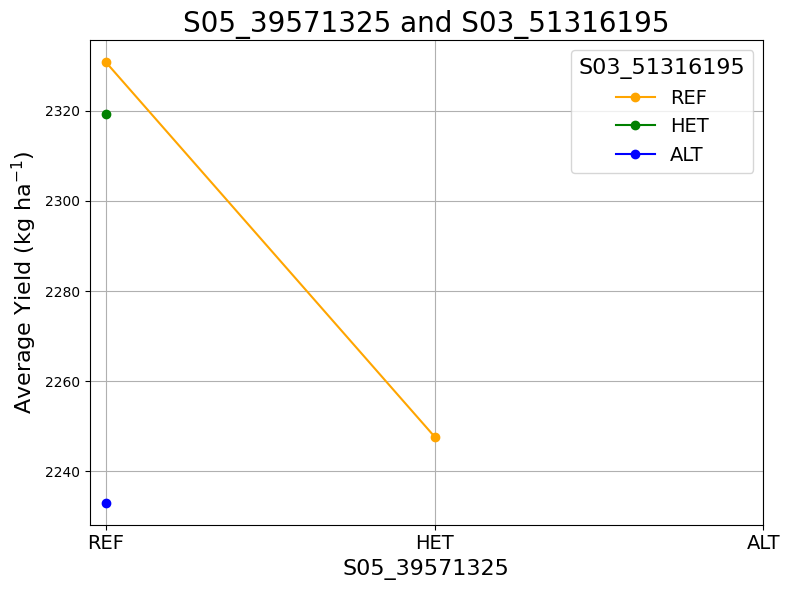

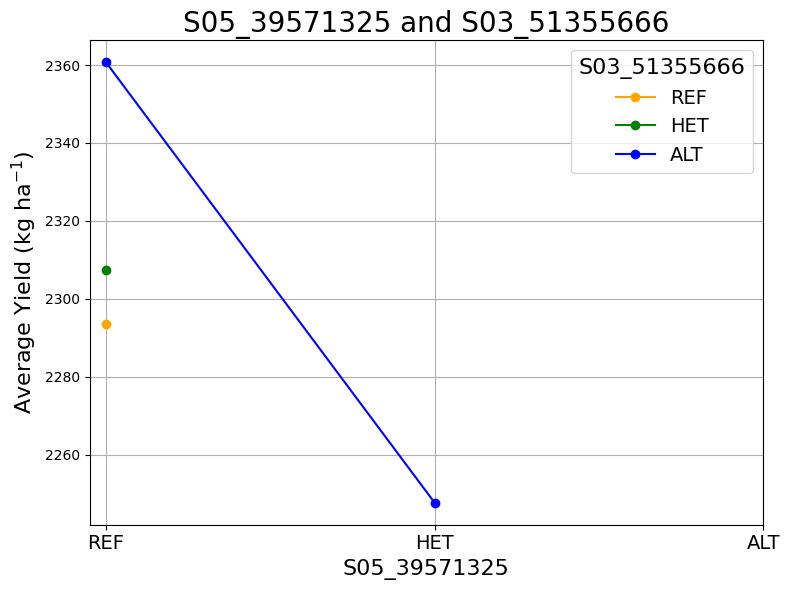

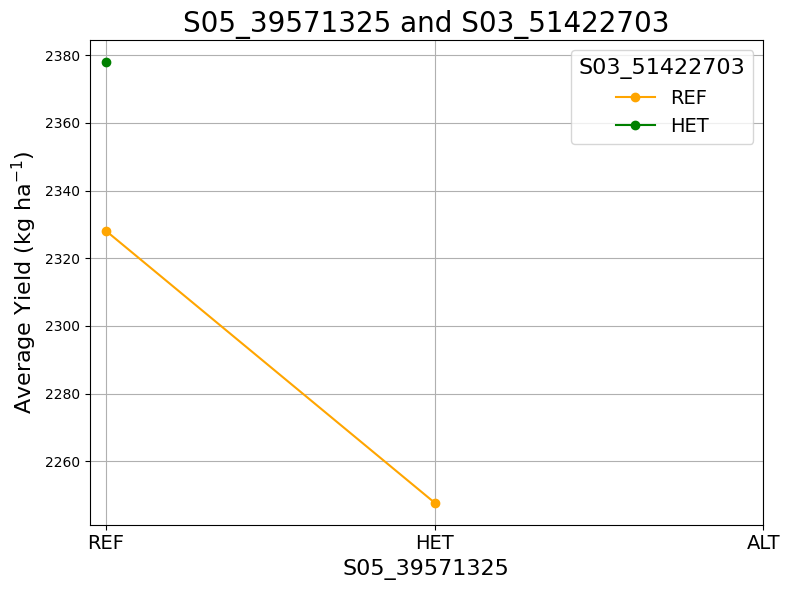

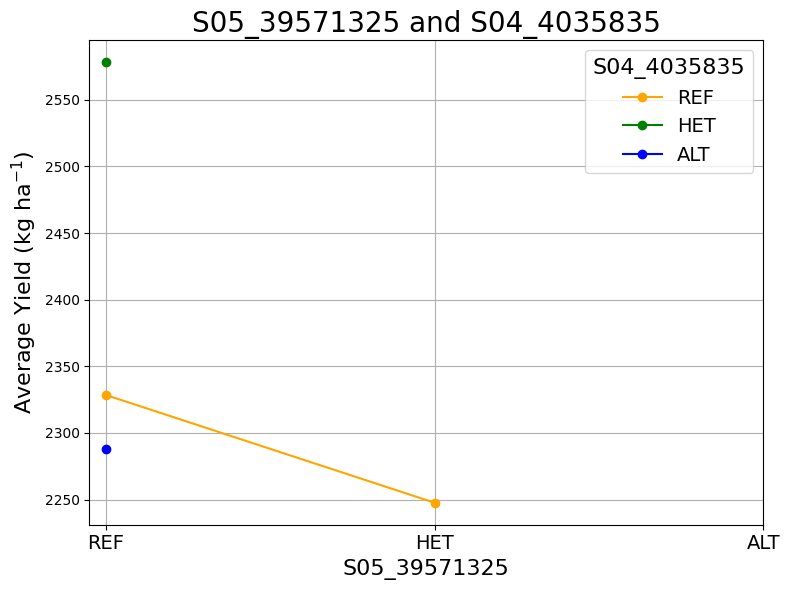

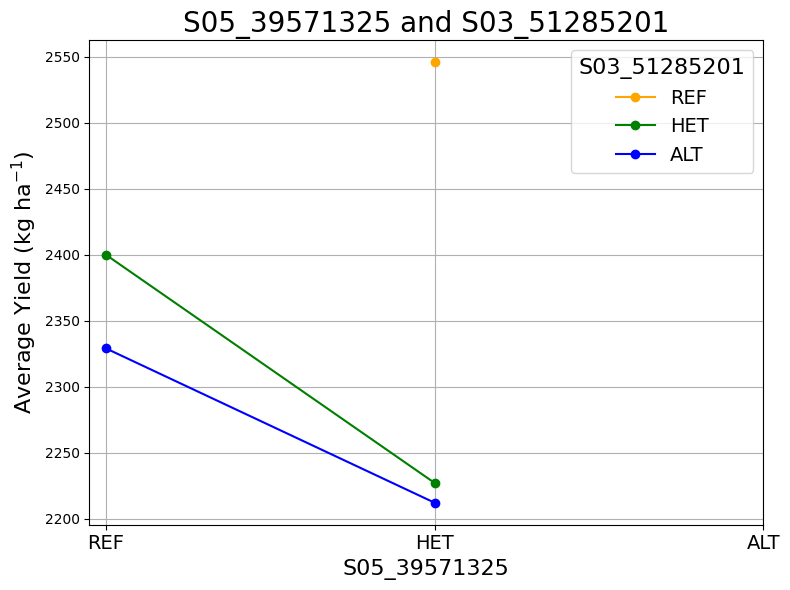

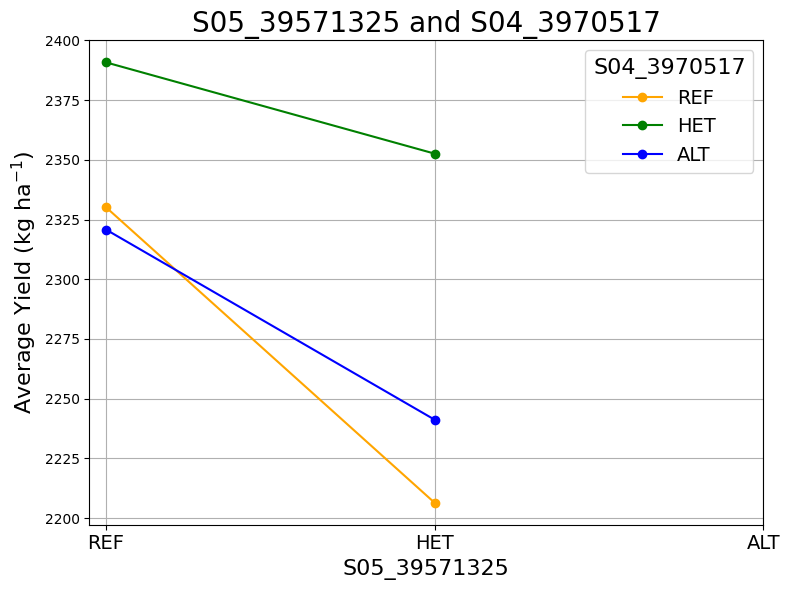

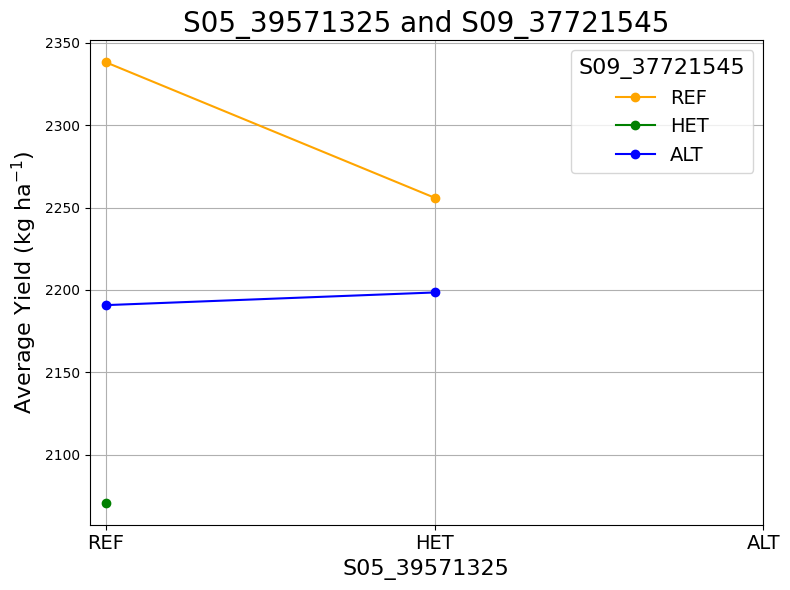

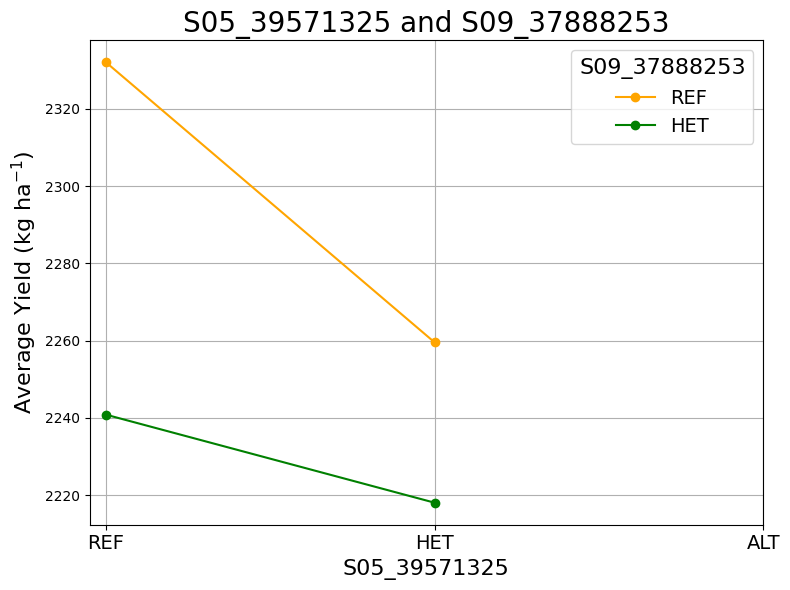

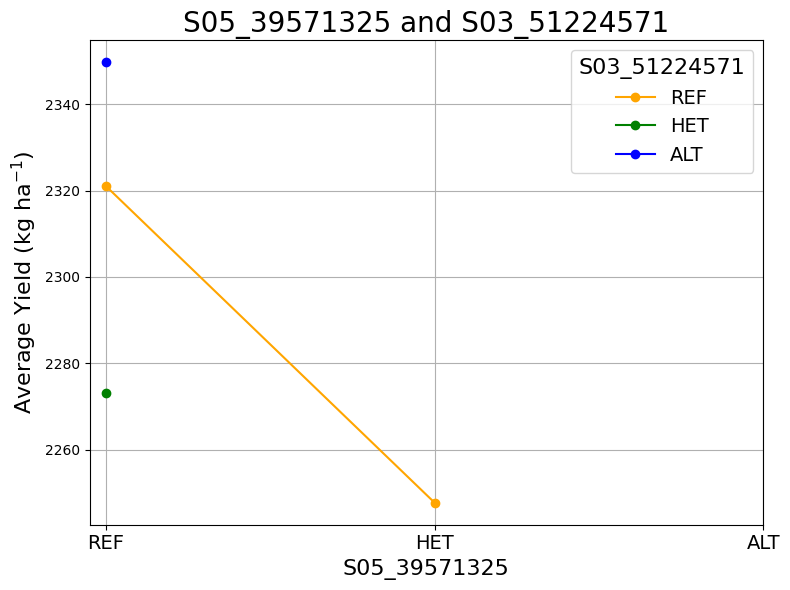

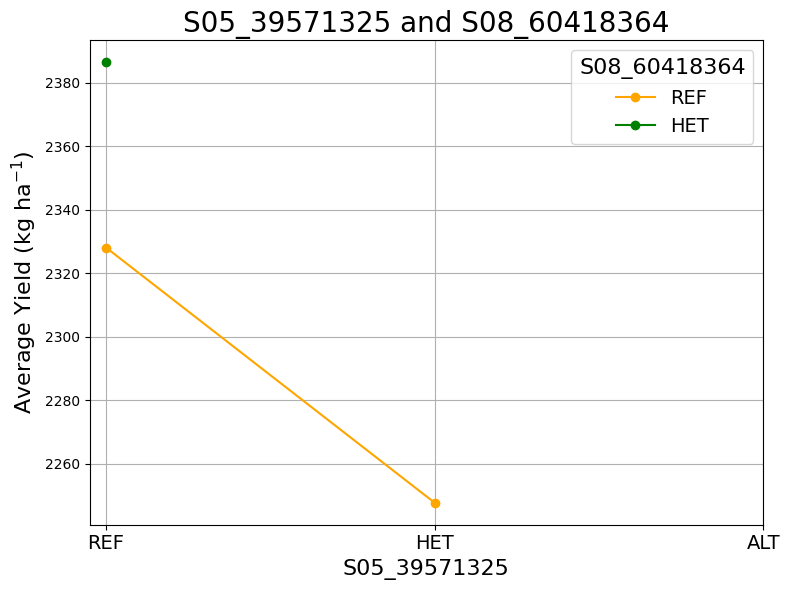

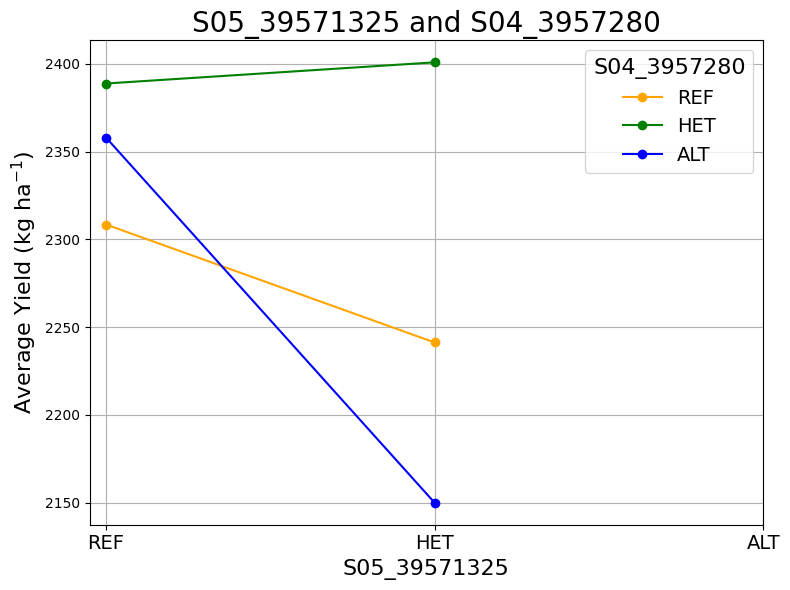

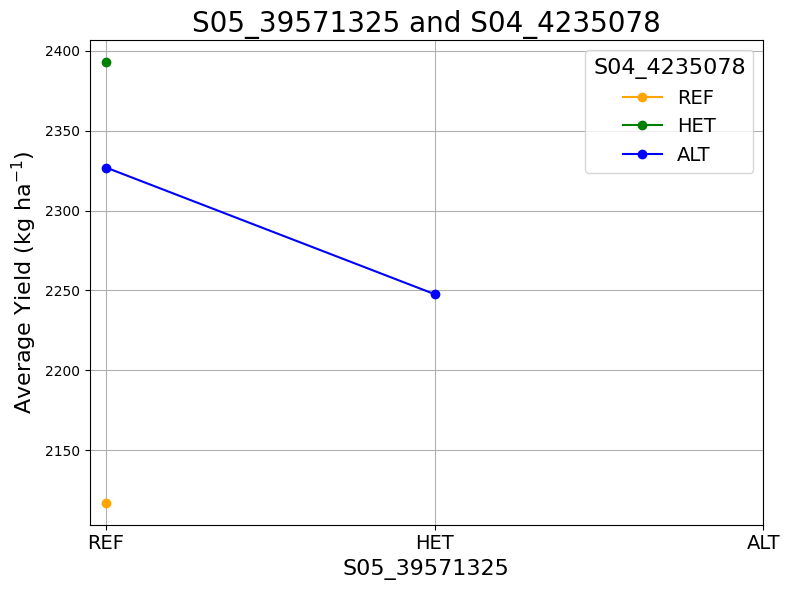

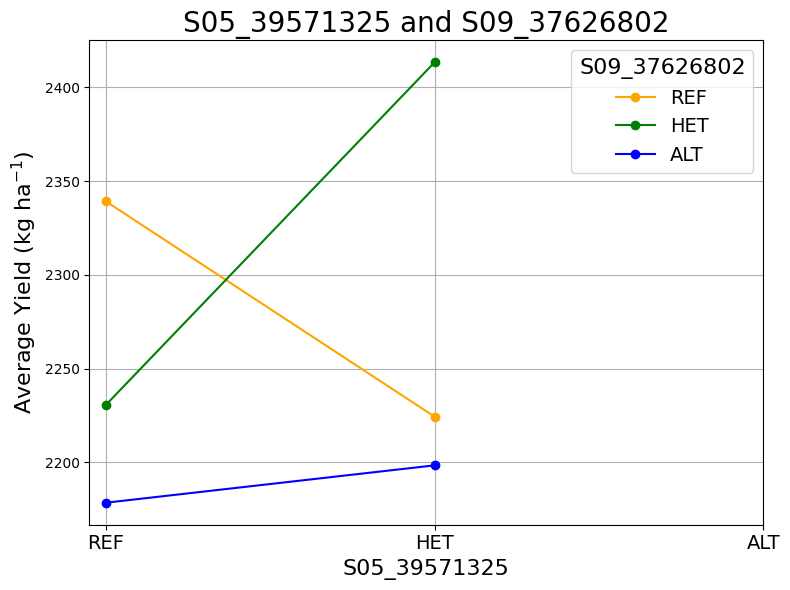

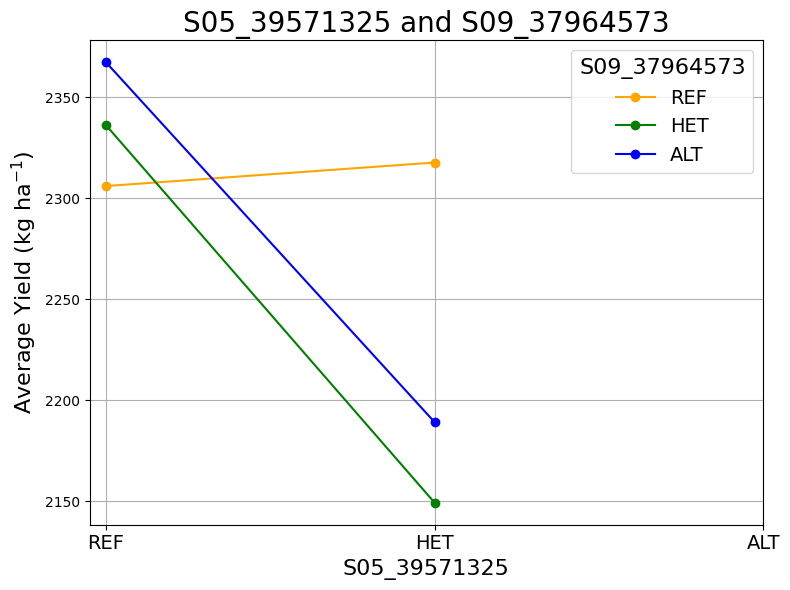

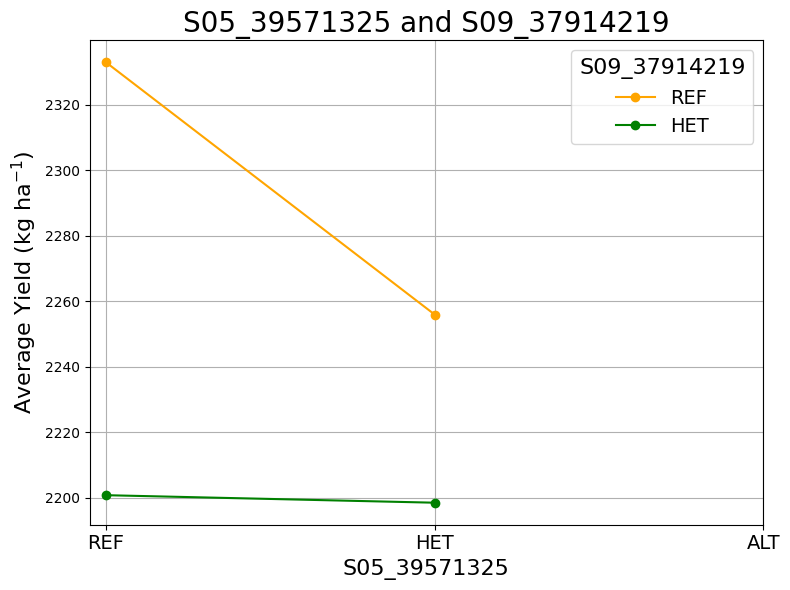

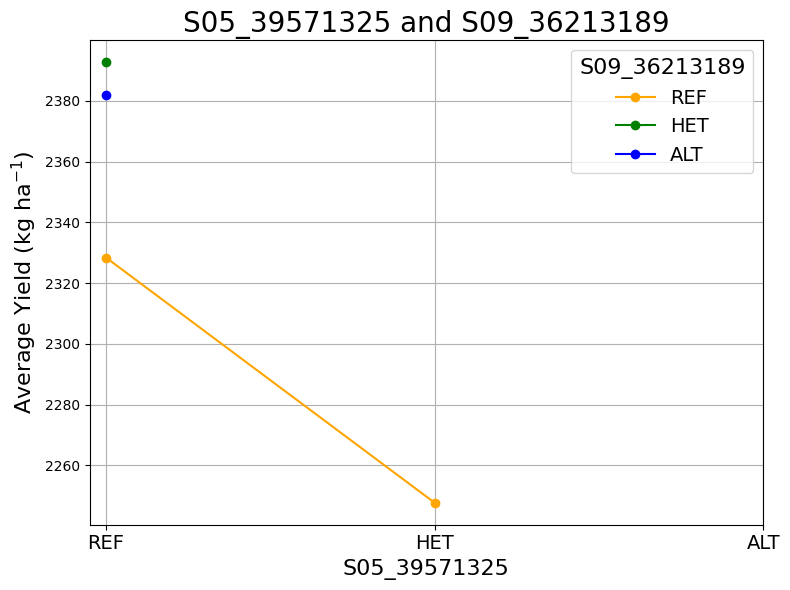

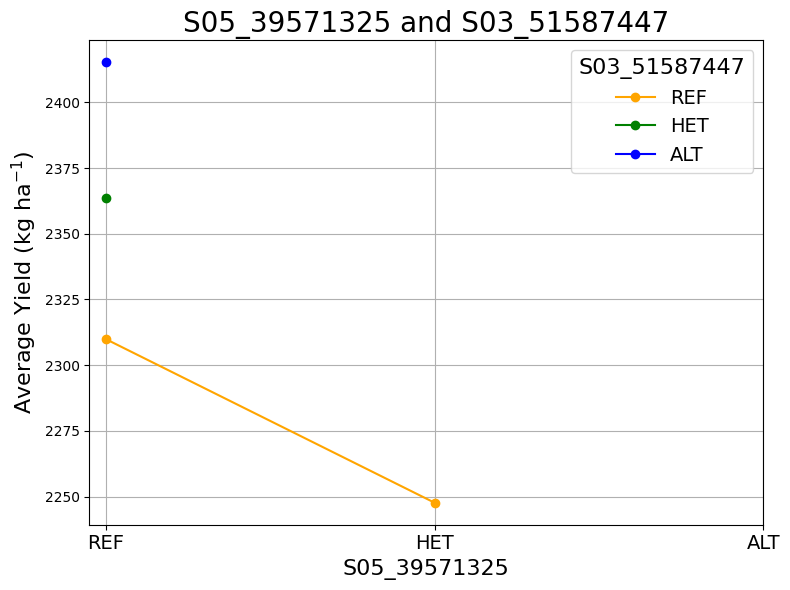

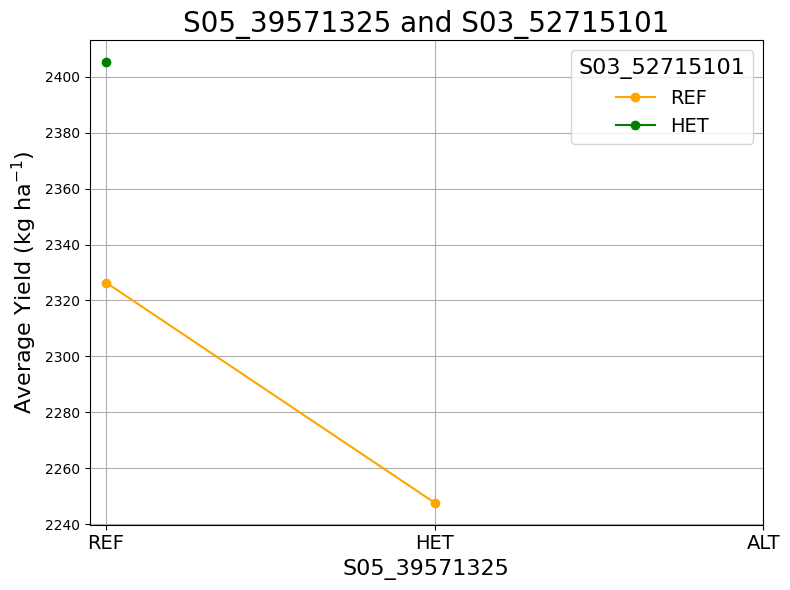

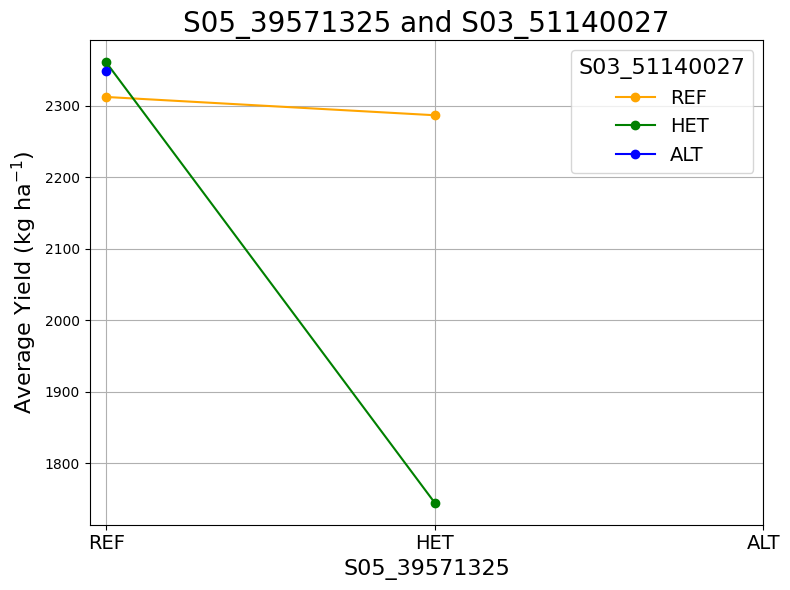

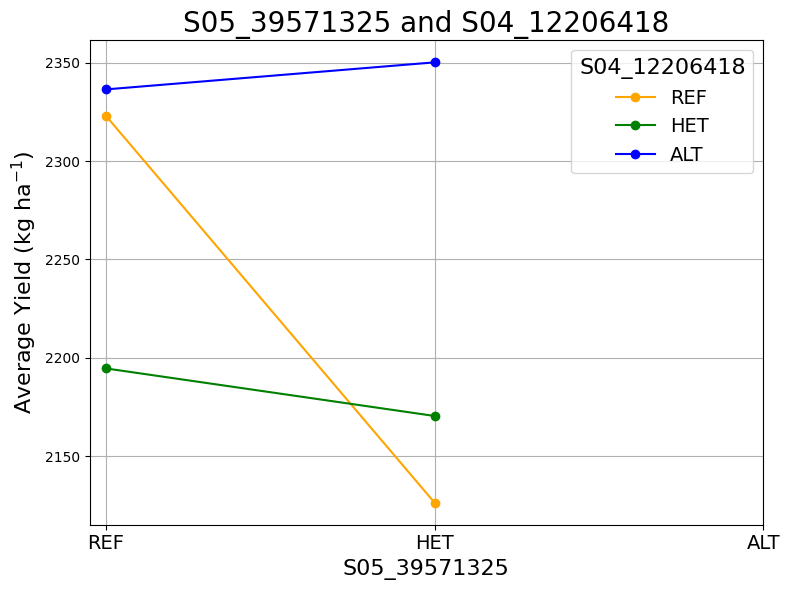

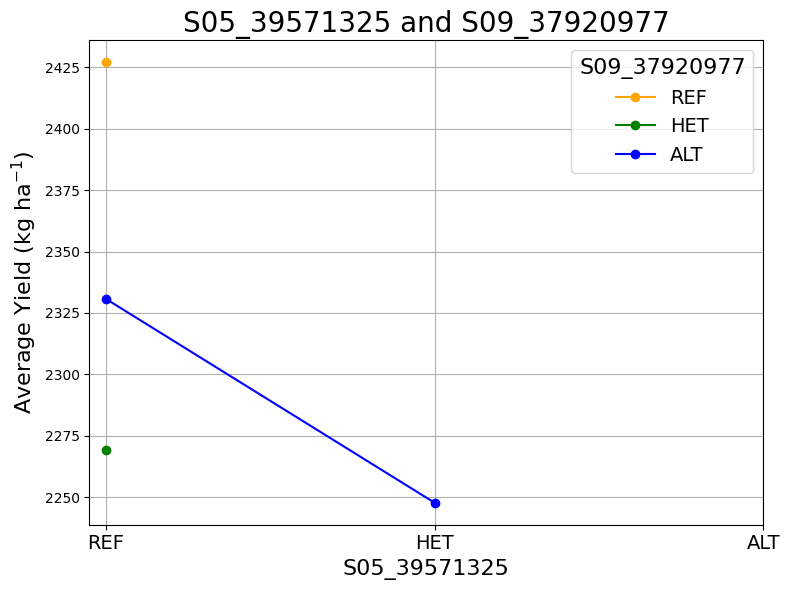

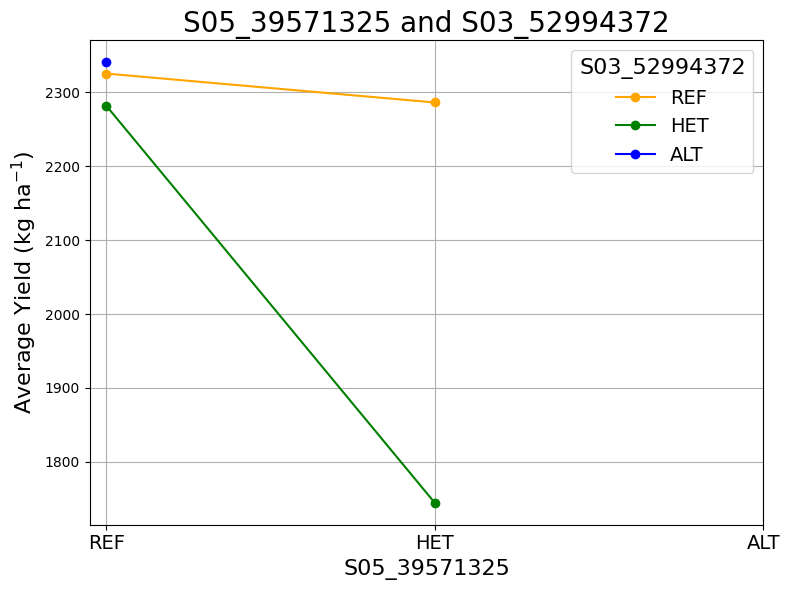

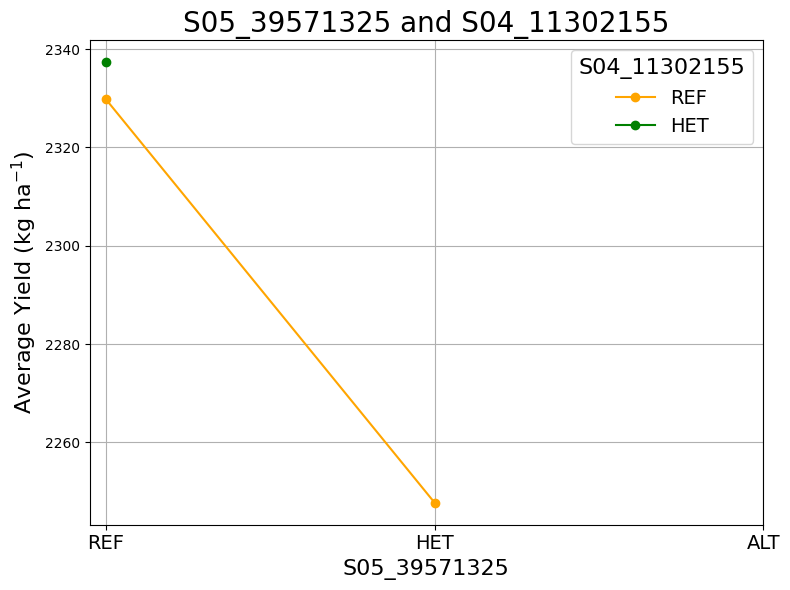

In [43]:
data = pd.read_csv("BLB_fullset.csv")
SY19 = data["pheno.yd19"]


marker_list = all_Col_Data["Column Marker"].tolist()
marker_list = marker_list[5]
for index in all_Col_Data.index:
    col_num = all_Col_Data.loc[index, "Row Marker"]
    row_num = all_Col_Data.loc[index, "Column Marker"]


    col1_index = geno.columns.get_loc(row_num)
    col2_index = geno.columns.get_loc(col_num)

    if row_num not in geno.columns or col_num not in geno.columns or \
        (row_num not in marker_list and col_num not in marker_list):
        continue

    loci_1 = geno.iloc[:, [col1_index, col2_index]]
    compare1 = pd.concat([SY19, loci_1], axis=1)
    compare1 = compare1[compare1["pheno.yd19"].notna()]
    compare1.columns = ["YD", "Marker 1", "Marker 2"]

    # Begin plotting
    plt.figure(figsize=(8, 6))


    marker2_levels = sorted(compare1["Marker 2"].dropna().unique())
    color_map = {0: "orange", 1: "green", 2: "blue"}
    label_map = {0: "REF", 1: "HET", 2: "ALT"}

    for m2_val in marker2_levels:
        sub_df = compare1[compare1["Marker 2"] == m2_val]
        grouped = sub_df.groupby("Marker 1")["YD"].mean().reset_index()

        plt.plot(grouped["Marker 1"], grouped["YD"], marker='o',
                 label=label_map.get(m2_val, f"Marker 2 = {m2_val}"),
                 color=color_map.get(m2_val, 'gray'))

    plt.xlabel(f"{row_num}", fontsize=16)
    plt.ylabel(r"Average Yield (kg ha$^{-1}$)", fontsize=16)
    plt.title(f"{row_num} and {col_num}", fontsize=20)
    plt.xticks([0, 1, 2], ['REF', 'HET', 'ALT'],fontsize=14)
    plt.legend(title=f"{col_num}",fontsize=14, title_fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Read and Plot Attention Scores

In [ ]:
# call epistasis scores and rename markers for consistency
epi = pd.read_csv("pheno.csv")
epi['Marker'] = epi["Marker"].apply(lambda x: x[5:] if isinstance(x, str) else x)

#call in genotype data and name markers
data = pd.read_csv("BLB_fullset.csv")
geno = data.drop(columns=[col for col in data.columns if "pheno" in col or col in ["Unnamed: 0", "Row.names"]])
geno.columns = geno.columns.str[5:]

#call in attention weights
attentionWeights = pd.read_csv("attention_weights_epoch49_BLB19.csv")
attentionWeights = np.abs(attentionWeights)

top_50= attentionWeights.unstack().sort_values(ascending=False).head(1000) #take top 1000 scores
top_50 = top_50.reset_index()
top_50.columns = ['Column', 'Row', 'Value']

#pull names of loci associated with highest scores
loci_indices_Column = top_50['Column'].values.astype(int)
loci_indices_Row = top_50['Row'].values.astype(int)
loci_list_Column = pd.DataFrame(geno.columns[loci_indices_Column])
loci_list_Row = pd.DataFrame(geno.columns[loci_indices_Row])

#concat all data for plotting
loci_list_all = pd.concat([loci_list_Row,loci_list_Column,top_50],axis=1)
loci_list_all.columns = ["Row Marker","Column Marker","Column Index","Row Index","Value"]

rows = loci_list_all.drop(["Column Marker","Column Index","Row Index"],axis=1)
columns = loci_list_all.drop(["Row Marker","Column Index","Row Index"],axis=1)

rows.columns = ["Marker","Value"]
columns.columns = ["Marker","Value"]

all_loci = pd.concat([rows,columns],axis=0)
all_data = pd.merge(all_loci,epi,on="Marker")

all_data.sort_values(by="pvalue.Q",ascending=True,inplace=True)

all_data.head()

Marker     Value  Chromosome  Position (bp)  pvalue.Q
1912  S05_2491000  0.955546           5        2491000   0.00059
1891  S05_2491000  0.956723           5        2491000   0.00059
1458  S05_2491000  0.988144           5        2491000   0.00059
479   S05_2491000  0.986495           5        2491000   0.00059
282   S05_2491000  1.010530           5        2491000   0.00059

In [ ]:

from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter and sort data
all_data_sample = all_data.copy()
all_data_filtered = all_data_sample[all_data_sample["Value"] > 1.0]
all_data_filtered = all_data_filtered[all_data_sample["pvalue.Q"] < 0.15]
all_data_filtered = all_data_filtered.sort_values(by="Value", ascending=False)
all_data_filtered = all_data_filtered.drop_duplicates(subset=["Marker"], keep="first")
top_data = all_data_filtered.head(12)

# Scatter plot
fig, ax = plt.subplots(figsize=(20, 15))
ax.scatter(all_data_sample["pvalue.Q"], all_data_sample["Value"],
           color='red', marker='o', s=100, zorder=2)

# Determine label starting position in top-right
xmax = all_data_sample["pvalue.Q"].max()
ymax = all_data_sample["Value"].max()

label_x = xmax * 1.02  # a bit right of the plot
label_y_start = ymax   # start at the top
label_y_step = (ymax - all_data_sample["Value"].min()) / 30  # space between labels

# Add labels with arrows pointing to data points
for idx, (i, row) in enumerate(top_data.iterrows()):
    label_y = label_y_start - idx * label_y_step
    ax.annotate(
        row["Marker"],
        xy=(row["pvalue.Q"], row["Value"]),
        xytext=(label_x, label_y),
        textcoords='data',
        ha='left', va='center',
        fontsize=24, color='blue',
        arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)
    )

# Labels and title
ax.set_xlabel("Epistasis p Value", fontsize=28)
ax.set_ylabel("Attention Score", fontsize=28)
ax.set_title("[A] Top Absolute Attention Scores vs. p Value", fontsize=32)
ax.axvline(x = 0.05, color = 'b', label = 'p = 0.05')

# Extend x-axis to fit labels
ax.set_xlim(right=label_x * 1.2)

plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()




/tmp/ipython-input-63-2601017977.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_data_filtered = all_data_filtered[all_data_sample["pvalue.Q"] < 0.15]


In [ ]:


# Load data
epi = pd.read_csv("pheno.csv")
epi['Marker'] = epi["Marker"].apply(lambda x: x[5:] if isinstance(x, str) else x)

data = pd.read_csv("BLB_fullset.csv")
geno = data.drop(columns=[col for col in data.columns if "pheno" in col or col in ["Unnamed: 0", "Row.names"]])
geno.columns = geno.columns.str[5:]

attentionWeights = pd.read_csv("attention_weights_epoch49_BLB19.csv")
attentionWeights = np.abs(attentionWeights)

averageWeights = attentionWeights.mean(axis=1)
averageWeightsAll = pd.concat([pd.DataFrame(geno.columns), pd.DataFrame(averageWeights)], axis=1)
averageWeightsAll.columns = ["Marker", "Value"]

# Unstack attention weights
all_attention = attentionWeights.unstack().reset_index()
all_attention.columns = ['Column', 'Row', 'Value']

# Map marker names to indices
loci_indices_Column = all_attention['Column'].values.astype(int)
loci_indices_Row = all_attention['Row'].values.astype(int)
loci_list_Column = pd.DataFrame(geno.columns[loci_indices_Column])
loci_list_Row = pd.DataFrame(geno.columns[loci_indices_Row])

# Combine marker names with attention values
loci_list_all = pd.concat([loci_list_Row, loci_list_Column, all_attention], axis=1)
loci_list_all.columns = ["Row Marker", "Column Marker", "Column Index", "Row Index", "Value"]

# Stack row/column markers into one "Marker" column
rows = loci_list_all[["Row Marker", "Value"]].rename(columns={"Row Marker": "Marker"})
columns = loci_list_all[["Column Marker", "Value"]].rename(columns={"Column Marker": "Marker"})
all_loci = pd.concat([rows, columns], axis=0)

# Merge with phenotype (epistasis) data
all_data = pd.merge(all_loci, epi, on="Marker")
all_data = all_data.loc[all_data.groupby('Marker')['Value'].idxmax()]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

x_raw = all_data["pvalue.Q"].values
y_raw = all_data["Value"].values

num_bins = [2315]
poly_degrees = [1]

for bin_count in num_bins:
    all_data['p_bin'] = pd.cut(all_data['pvalue.Q'], bins=bin_count)
    binned = all_data.groupby('p_bin').agg({
        'pvalue.Q': 'mean',
        'Value': 'max'
    }).dropna()

    x = binned['pvalue.Q'].values
    y = binned['Value'].values

    fig, ax = plt.subplots(figsize=(20, 15))
    ax.scatter(x, y, color='blue', s=60, alpha=0.8, label='Marker')
    ax.axvline(x=0.05, color='gray', linestyle='--', linewidth=2, label='p = 0.05')


    for degree in poly_degrees:
        # Create polynomial features
        X_poly = np.column_stack([x**d for d in range(degree + 1)])
        X_poly = sm.add_constant(X_poly)  # adds intercept term

        # Fit OLS model
        model = sm.OLS(y, X_poly).fit()

        # Check if model is significant
        if model.f_pvalue < 0.05:
            # Evaluate polynomial at x = 0.05
            x_eval = 0.05
            x_input = np.array([x_eval**d for d in range(degree + 1)])
            x_input = sm.add_constant(x_input.reshape(1, -1))  # reshape to 2D and add intercept
            y_at_005 = model.predict(x_input)[0]
            print(f"Degree {degree} | Model p-value = {model.f_pvalue:.4f} | y at x=0.05 = {y_at_005:.4f}")
        else:
            print(f"Degree {degree} | Model not significant (p = {model.f_pvalue:.4f})")

        # Plotting
        x_line = np.linspace(x.min(), x.max(), 500)
        x_line_poly = np.column_stack([x_line**d for d in range(degree + 1)])
        x_line_poly = sm.add_constant(x_line_poly)
        y_line = model.predict(x_line_poly)
        r2 = r2_score(y, model.predict(X_poly))

        ax.plot(x_line, y_line, lw=2, color="red", label=f'regression line (R²={r2:.2f})')

    ax.set_xlabel("Epistasis p Value", fontsize=30)
    ax.set_ylabel("Max Attention Score", fontsize=30)
    ax.set_title(f"[B] Max Attention vs. p-Value for All Markers", fontsize=30)
    ax.legend(fontsize=24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-60-3965619872.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = all_data.groupby('p_bin').agg({


Degree 1 | Model p-value = 0.0000 | y at x=0.05 = 0.9350
